In [ ]:
!pip install scgen[tutorials] wget

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import logging
import scanpy as sc
import scgen

In [ ]:
train = sc.read('/content/drive/My Drive/scGen/blastoma.h5ad')

In [ ]:
train.obs["cell_type"].value_counts()

cell_type
endothelial cell                              5874
fibroblast                                    5415
type II pneumocyte                            2891
smooth muscle cell                            1652
endothelial cell of lymphatic vessel           730
epithelial cell of lower respiratory tract     710
type I pneumocyte                              673
pericyte                                       324
ciliated cell                                  117
Name: count, dtype: int64

In [ ]:
train_ec = train[train.obs["cell_type"] == 'endothelial cell']

In [ ]:
train_ec.obs["disease"].value_counts()

disease
normal                 3403
pulmonary emphysema    2471
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
<ipython-input-19-a7022739cb14>:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


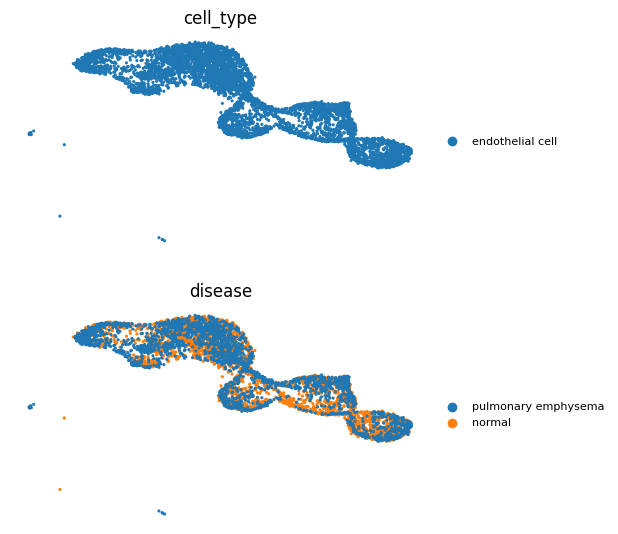

In [ ]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 5, 3
sc.pl.umap(train_ec, color=['cell_type', 'disease'], legend_fontsize=8, show=False, frameon=False, ncols=1)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_ec_dis = train_ec[train_ec.obs["disease"] == 'pulmonary emphysema']

In [ ]:
train_ec_norm = train_ec[train_ec.obs["disease"] == 'normal']

In [ ]:
train_ec_dis.obs["disease"].value_counts()

disease
pulmonary emphysema    2471
Name: count, dtype: int64

In [ ]:
train_ec_norm.obs["disease"].value_counts()

disease
normal    3403
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc

n_cells_to_sample = 2937 - train_ec_dis.shape[0]

random_indices = np.random.choice(train_ec_dis.obs_names, size=n_cells_to_sample, replace=True)

cells_to_upsample = train_ec_dis[random_indices, :]

train_ec_dis_upsampled = sc.concat([train_ec_dis, cells_to_upsample], axis=0, join='outer')

train_ec_dis_upsampled.obs_names_make_unique()  # In case of duplicated indices


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
train_ec_dis_upsampled.obs["disease"].value_counts()

disease
pulmonary emphysema    2937
Name: count, dtype: int64

In [ ]:
import numpy as np

# Assuming your AnnData object is called adata
# Get the number of rows (observations)
num_obs = train_ec_norm.n_obs

# Define the number of rows to remove
num_to_remove = 446

# Generate random indices to remove
remove_indices = np.random.choice(num_obs, size=num_to_remove, replace=False)

# Keep all indices except the ones to remove
keep_indices = [i for i in range(num_obs) if i not in remove_indices]

# Subset the AnnData object using keep indices
train_ec_norm_new = train_ec_norm[keep_indices].copy()

In [ ]:
train_ec_norm_new.obs["disease"].value_counts()

disease
normal    2957
Name: count, dtype: int64

In [ ]:
import scanpy as sc

# Assuming you have two AnnData objects named adata1 and adata2

# 1. Concatenate the AnnData objects
ec_new = sc.concat([train_ec_norm_new, train_ec_dis_upsampled], axis=0, join='outer', label='source')


In [ ]:
ec_new

AnnData object with n_obs × n_vars = 5894 × 24139
    obs: 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'source'
    obsm: 'X_pca', 'X_umap'

<ipython-input-41-03edd9a838bb>:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


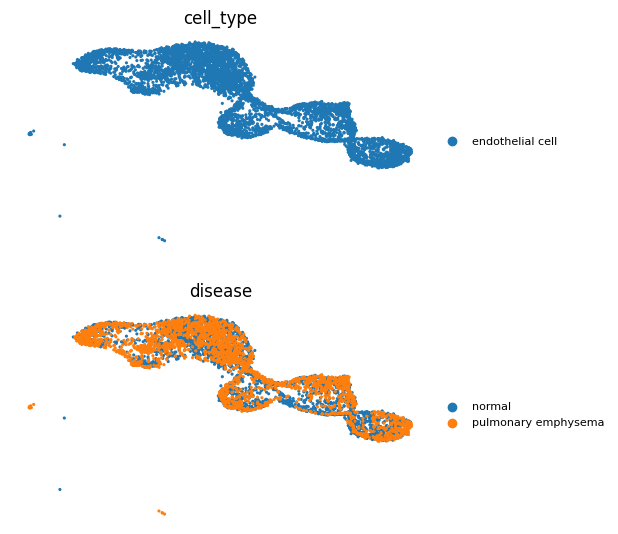

In [ ]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 5, 3
sc.pl.umap(ec_new, color=['cell_type', 'disease'], legend_fontsize=8, show=False, frameon=False, ncols=1)
plt.tight_layout()
plt.show()

In [ ]:
ec_new.write('/content/drive/MyDrive/scGen/Results/Blastoma/ec_new.h5ad', compression='lzf')

In [ ]:
def downsample(train, num_to_remove):
  num_obs = train.n_obs

  # Generate random indices to remove
  remove_indices = np.random.choice(num_obs, size=num_to_remove, replace=False)

  # Keep all indices except the ones to remove
  keep_indices = [i for i in range(num_obs) if i not in remove_indices]

  # Subset the AnnData object using keep indices
  return train[keep_indices].copy(), train[remove_indices].copy()

In [ ]:
ec_train, ec_validtest = downsample(ec_new, 1769)

In [ ]:
ec_train

AnnData object with n_obs × n_vars = 4125 × 24139
    obs: 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'source'
    uns: 'cell_type_colors', 'disease_colors'
    obsm: 'X_pca', 'X_umap'

In [ ]:
ec_valid, ec_test = downsample(ec_validtest, 885)

In [ ]:
ec_valid

AnnData object with n_obs × n_vars = 884 × 24139
    obs: 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'source'
    uns: 'cell_type_colors', 'disease_colors'
    obsm: 'X_pca', 'X_umap'

In [ ]:
ec_test

AnnData object with n_obs × n_vars = 885 × 24139
    obs: 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'source'
    uns: 'cell_type_colors', 'disease_colors'
    obsm: 'X_pca', 'X_umap'

In [ ]:
ec_train.write('/content/drive/MyDrive/scGen/Results/Blastoma/ec_train.h5ad', compression='lzf')

In [ ]:
ec_valid.write('/content/drive/MyDrive/scGen/Results/Blastoma/ec_valid.h5ad', compression='lzf')

In [ ]:
ec_test.write('/content/drive/MyDrive/scGen/Results/Blastoma/ec_test.h5ad', compression='lzf')

In [ ]:
ec_test = sc.read('/content/drive/MyDrive/scGen/Results/Blastoma/ec_test.h5ad')

In [ ]:
ec_train1 = sc.concat([ec_train, ec_valid], axis=0, join='outer', label='source')

In [ ]:
ec_train1.write('/content/drive/MyDrive/scGen/Results/Blastoma/ec_train1.h5ad', compression='lzf')

In [ ]:
ec_train1 = sc.read('/content/drive/MyDrive/scGen/Results/Blastoma/ec_train1.h5ad')

In [ ]:
ec_train1.obs

,donor_id,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,celltype,organism_ontology_term_id,assay_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,source,_scvi_batch,_scvi_labels
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAACCCTAA-1_1,NL1,7705.0,2293,13.134328,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,a(D!$BBV4A,0,0,0
AAACCCATCCATTGTT-1_1,NL1,1937.0,817,0.567888,9,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,ZoK6@NV(%L,0,0,0
AAACGCTGTCTCACAA-1_1,NL1,10545.0,3029,4.438122,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,LXr~XpeyCC,0,0,0
AAAGGATAGCGTGTTT-1_1,NL1,2228.0,1278,1.436266,10,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,!;c`3#CWa$,0,0,0
AAAGGATGTTATCCAG-1_1,NL1,23820.0,4648,4.273720,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,Ch+Hjz16Me,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGATGAAGGTAGATT-1_5,Emp2,11530.0,3056,2.914137,4,Endothelial,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,pulmonary emphysema,Homo sapiens,female,alveolus of lung,unknown,63-year-old human stage,@Z{EKR5sfW,1,1,0
GGTGTCGGTAACGGTG-1_1,NL1,14780.0,3961,4.817321,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,2T%JY#4^d8,1,0,0
GAAGTAACACATACGT-1_2,NL2,2851.0,1293,3.893371,4,Endothelial,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,unknown,60-year-old human stage,8XsBRjv%`L,1,0,0


In [ ]:
scgen.SCGEN.setup_anndata(ec_train1, batch_key="disease", labels_key="cell_type")

In [ ]:
model = scgen.SCGEN(ec_train1)
model.save("/content/drive/MyDrive/scGen/saved_models/blast_ec_300epochs.pt", overwrite=True)

In [ ]:
model.train(
    max_epochs=300,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=300
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should

Epoch 300/300: 100%|██████████| 300/300 [16:18<00:00,  3.25s/it, v_num=1, train_loss_step=849, train_loss_epoch=885]

INFO: `Trainer.fit` stopped: `max_epochs=300` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [16:18<00:00,  3.26s/it, v_num=1, train_loss_step=849, train_loss_epoch=885]


In [ ]:
model.save("/content/drive/MyDrive/scGen/saved_models/blast_ec_300epochs.pt", overwrite=True)

In [ ]:
model = scgen.SCGEN.load('/content/drive/MyDrive/scGen/saved_models/blast_ec_300epochs.pt', ec_train1)

INFO     File /content/drive/MyDrive/scGen/saved_models/blast_ec_300epochs.pt/model.pt already downloaded          


In [ ]:
latent_X = model.get_latent_representation()
latent_adata = sc.AnnData(X=latent_X, obs=ec_train1.obs.copy())
latent_adata.write('/content/drive/MyDrive/scGen/Results/Blastoma/blast_ec_300epochs.h5ad', compression='lzf')

In [ ]:
sc.settings.figdir = '/content/drive/MyDrive/scGen/Results/Blastoma'

         Falling back to preprocessing with `sc.pp.pca` and default params.


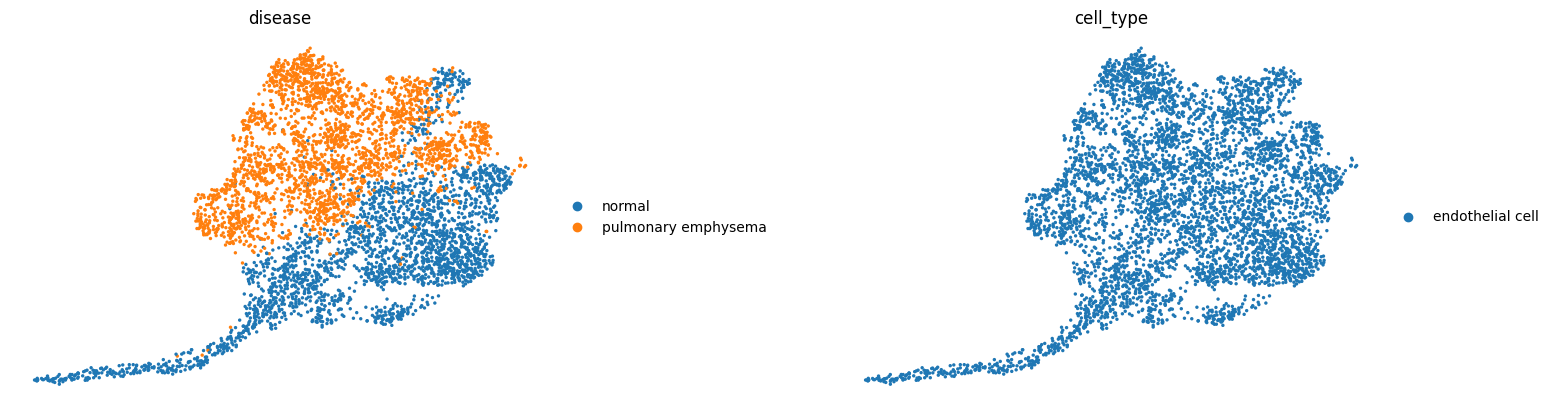

In [ ]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)
sc.pl.umap(latent_adata, color=['disease', 'cell_type'], wspace=0.4, frameon=False,
           save='latentspace_blast_ec_300epochs.jpeg')

In [ ]:
latent_adata

AnnData object with n_obs × n_vars = 5009 × 100
    obs: 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'source', '_scvi_batch', '_scvi_labels'
    uns: 'neighbors', 'umap', 'disease_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
latent_adata.obs

,donor_id,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,celltype,organism_ontology_term_id,assay_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,...,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,source,_scvi_batch,_scvi_labels
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAACCCTAA-1_1,NL1,7705.0,2293,13.134328,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,a(D!$BBV4A,0,0,0
AAACCCATCCATTGTT-1_1,NL1,1937.0,817,0.567888,9,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,ZoK6@NV(%L,0,0,0
AAACGCTGTCTCACAA-1_1,NL1,10545.0,3029,4.438122,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,LXr~XpeyCC,0,0,0
AAAGGATAGCGTGTTT-1_1,NL1,2228.0,1278,1.436266,10,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,!;c`3#CWa$,0,0,0
AAAGGATGTTATCCAG-1_1,NL1,23820.0,4648,4.273720,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,Ch+Hjz16Me,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGATGAAGGTAGATT-1_5,Emp2,11530.0,3056,2.914137,4,Endothelial,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,pulmonary emphysema,Homo sapiens,female,alveolus of lung,unknown,63-year-old human stage,@Z{EKR5sfW,1,1,0
GGTGTCGGTAACGGTG-1_1,NL1,14780.0,3961,4.817321,4,Endothelial,NCBITaxon:9606,EFO:0009922,HANCESTRO:0005,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,European,63-year-old human stage,2T%JY#4^d8,1,0,0
GAAGTAACACATACGT-1_2,NL2,2851.0,1293,3.893371,4,Endothelial,NCBITaxon:9606,EFO:0009922,unknown,UBERON:0002299,...,normal,Homo sapiens,male,alveolus of lung,unknown,60-year-old human stage,8XsBRjv%`L,1,0,0


In [ ]:
import numpy as np

In [ ]:
print(latent_adata.obsm.keys())

KeysView(AxisArrays with keys: X_pca, X_umap)


In [ ]:
print(ec_train1.obsm.keys())

KeysView(AxisArrays with keys: X_pca, X_umap)


In [ ]:
latent_representations = latent_adata.obsm['X_umap']
X = np.array(latent_representations)

In [ ]:
latent_representations = ec_train1.obsm['X_umap']
X1 = np.array(latent_representations)

In [ ]:
labels = ec_train1.obs['disease']
y1 = labels.to_numpy()  # Convert to NumPy array

In [ ]:
labels = latent_adata.obs['disease']
y = labels.to_numpy()  # Convert to NumPy array

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have your latent representations in 'X' and labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the classifier
model = LogisticRegression(solver='liblinear')

# Train the classifier
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_test  # The true labels of your test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)



Accuracy: 0.9181636726546906


In [ ]:
a = sc.read('/content/drive/MyDrive/scGen/Results/Blastoma/blast_ec_test_300epochs.h5ad')

In [ ]:
print(a.obsm.keys())

KeysView(AxisArrays with keys: )


In [ ]:
latent_representations = latent_adata.obsm['X_umap']
X = np.array(latent_representations)

labels = latent_adata.obs['disease']
y = labels.to_numpy()  # Convert to NumPy array

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y  # The true labels of your test set
y_pred = model.predict(X)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)


ValueError: operands could not be broadcast together with shapes (885,) (885,2) 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have your latent representations in 'X' and labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

# Create the classifier
model1 = LogisticRegression(solver='liblinear')

# Train the classifier
model1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_test  # The true labels of your test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.49001996007984033


In [ ]:
model = scgen.SCGEN.load('/content/drive/MyDrive/scGen/saved_models/blast_ec_300epochs.pt', ec_test)

INFO     File /content/drive/MyDrive/scGen/saved_models/blast_ec_300epochs.pt/model.pt already downloaded          


In [ ]:
latent_X = model.get_latent_representation()
latent_adata = sc.AnnData(X=latent_X, obs=ec_test.obs.copy())
latent_adata.write('/content/drive/MyDrive/scGen/Results/Blastoma/blast_ec_test_300epochs.h5ad', compression='lzf')

In [ ]:
latent_representations = latent_adata.obsm['X_umap']
X = np.array(latent_representations)

In [ ]:
labels = ec_test.obs['disease']
y = labels.to_numpy()  # Convert to NumPy array

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have your latent representations in 'X' and labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the classifier
model = LogisticRegression(solver='liblinear')

# Train the classifier
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_test  # The true labels of your test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7909604519774012


In [ ]:
scgen.SCGEN.setup_anndata(train, batch_key="disease", labels_key="cell_type")

In [ ]:
model = scgen.SCGEN(train)
model.save("/content/drive/MyDrive/scGen/saved_models/blast_all_300epochs.pt", overwrite=True)

In [ ]:
model.train(
    max_epochs=300,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=300
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/c

Epoch 300/300: 100%|██████████| 300/300 [1:01:22<00:00, 12.17s/it, v_num=1, train_loss_step=911, train_loss_epoch=786]    

INFO: `Trainer.fit` stopped: `max_epochs=300` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [1:01:22<00:00, 12.28s/it, v_num=1, train_loss_step=911, train_loss_epoch=786]


In [ ]:
model.save("/content/drive/MyDrive/scGen/saved_models/blast_all_300epochs.pt", overwrite=True)

In [ ]:
latent_X = model.get_latent_representation()
latent_adata = sc.AnnData(X=latent_X, obs=train.obs.copy())
latent_adata.write('/content/drive/MyDrive/scGen/Results/Blastoma/pulm_ec_all_300epochs.h5ad', compression='lzf')

         Falling back to preprocessing with `sc.pp.pca` and default params.


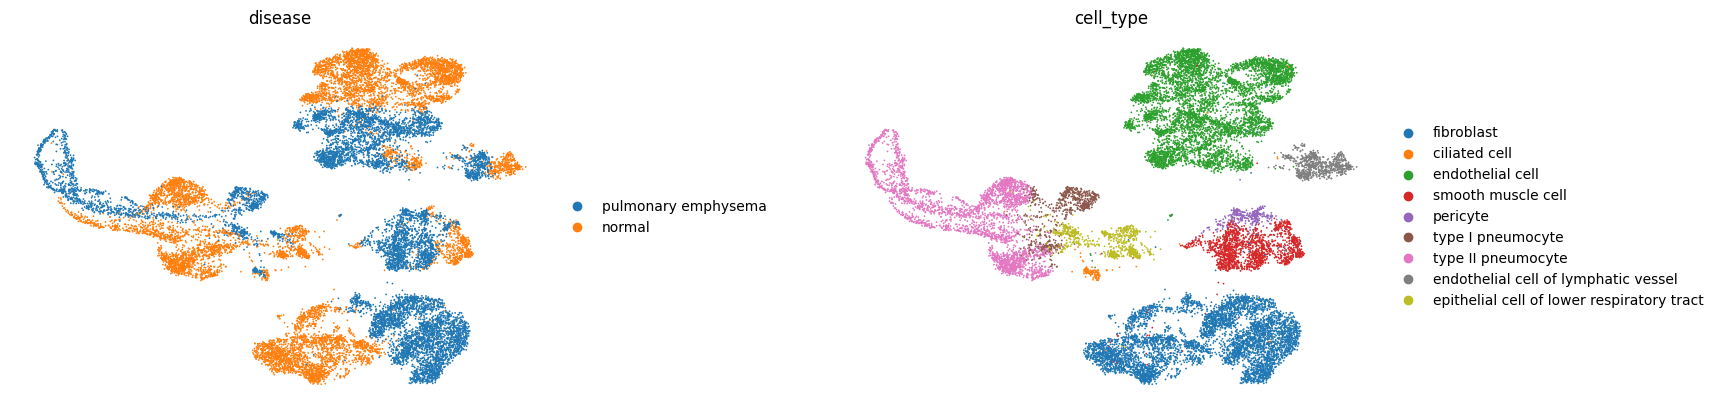

In [ ]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)
sc.pl.umap(latent_adata, color=['disease', 'cell_type'], wspace=0.4, frameon=False,
           save='latentspace_blast_all_300epochs.jpeg')

In [ ]:
latent_representations = latent_adata.obsm['X_umap']
X = np.array(latent_representations)

In [ ]:
labels = latent_adata.obs['disease']
y = labels.to_numpy()  # Convert to NumPy array

In [ ]:
# Assuming you have your latent representations in 'X' and labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the classifier
model = LogisticRegression(solver='liblinear')

# Train the classifier
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_true = y_test  # The true labels of your test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6204458945078847


In [ ]:
latent1 = latent_adata[latent_adata.obs["cell_type"] == 'endothelial cell']

In [ ]:
latent_representations = latent1.obsm['X_umap']
X = np.array(latent_representations)

In [ ]:
labels = latent1.obs['disease']
y = labels.to_numpy()  # Convert to NumPy array

In [ ]:
# Assuming you have your latent representations in 'X' and labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the classifier
model = LogisticRegression(solver='liblinear')

# Train the classifier
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_true = y_test  # The true labels of your test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9242553191489362


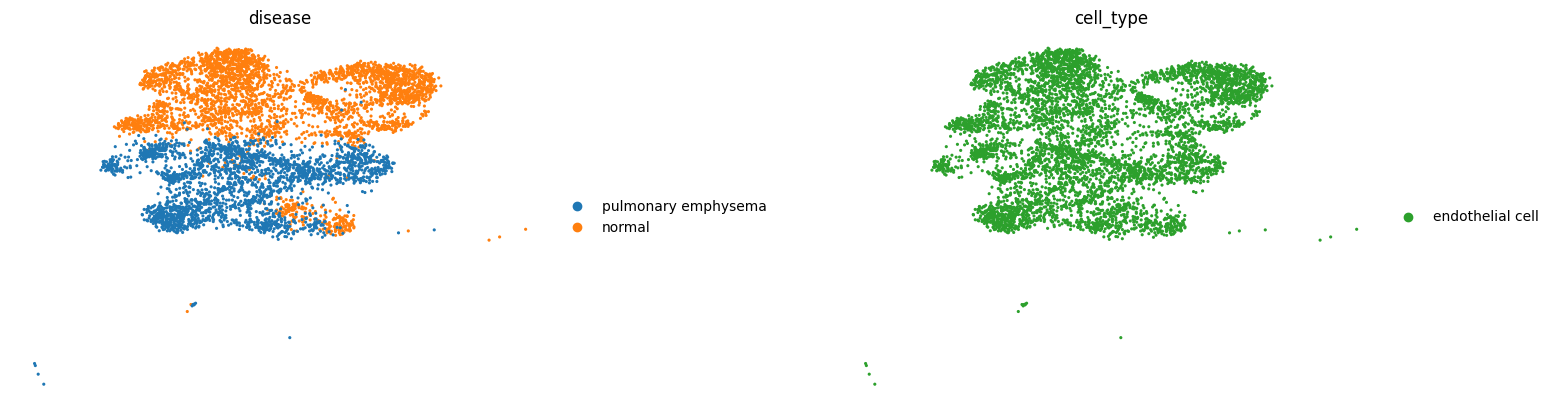

In [ ]:
sc.pl.umap(latent1, color=['disease', 'cell_type'], wspace=0.4, frameon=False,
           save='latent1space_blast_all_300epochs.jpeg')

In [ ]:
ec_new = sc.read('/content/drive/MyDrive/scGen/Results/Blastoma/ec_new.h5ad')

In [ ]:
scgen.SCGEN.setup_anndata(ec_new, batch_key="disease", labels_key="cell_type")

In [ ]:
model = scgen.SCGEN(ec_new)
model.save("/content/drive/MyDrive/scGen/saved_models/pulm_ec_300.pt", overwrite=True)

In [ ]:
model.train(
    max_epochs=300,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=300
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/c

Epoch 300/300: 100%|██████████| 300/300 [19:35<00:00,  3.92s/it, v_num=1, train_loss_step=958, train_loss_epoch=900]

INFO: `Trainer.fit` stopped: `max_epochs=300` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [19:35<00:00,  3.92s/it, v_num=1, train_loss_step=958, train_loss_epoch=900]


In [ ]:
model.save("/content/drive/MyDrive/scGen/saved_models/pulm_ec_300.pt", overwrite=True)